## Análise de Redes de aeroportos

- Esse é o projeto da matéria Análise de Redes(2024.1) - IMD/UFRN
- O projeto consiste em uma análise de voos entre aeroportos dos Estados Unidos, com o obejtivo de:
    - Identificar os aeroportos mais conectados
    - Analisar a distribuição de rotas
    - Avaliar a conectividade da rede
    - Calcular diferentes métricas de centralidade para identificar aeroportos estratégicos
    - Determinar coeficientes de clustering para entender a coesão da rede
- Os dados foram extraídos do Kaggle: https://www.kaggle.com/datasets/tylerx/flights-and-airports-data/data

### Bases utilizadas:
- airports:
     - airport_id: Identificador único de cada aeroporto
     - city: Cidade do aeroporto
     - state: Estado do aeroporto
     - name: Nome do aeroporto
- fligths:
    - DayofMonth: Dia do mês do voo
    - DayOfWeek: Dia da semana do voo
    - Carrier: Empresa do voo
    - OriginAirportID: Identificador único do aeroporto de partida
    - DestAirportID: Identificador único do aeroporto de destino
    - DepDelay: Tempo de atraso na partida
    - ArrDelay: Tempo de atraso na chegada

 - Para melhor visualização e entendimento, trabalharemos com outra base criada a partir das duas fornecidas pelo kaggle usando os nomes dos aeroportos ao invés do ID
 - Os aeroportos serão os nós do nosso grafos e as rotas(conexões entre os aeroportos que indicam a existência de um voo direto entre dois pontos) as arestas

In [7]:
#Importando as bibliotecas
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pyvis.network as net
import streamlit as st
from networkx.algorithms import community

In [8]:
# Carregando os datasets
airports = pd.read_csv('../data/airports.csv')
flights = pd.read_csv('../data/flights_names.csv')

In [9]:
airports.head()

,airport_id,city,state,name
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport


In [10]:
flights.head()

,DayofMonth,DayOfWeek,Carrier,airport_id,DepDelay,ArrDelay,OriginAirport,DestAirport
0,19,5,DL,13303,-3,1,Detroit Metro Wayne County,Miami International
1,19,5,DL,12478,0,-8,Salt Lake City International,John F. Kennedy International
2,19,5,DL,14869,-4,-15,Portland International,Salt Lake City International
3,19,5,DL,11433,28,24,Lambert-St. Louis International,Detroit Metro Wayne County
4,19,5,DL,12892,-6,-11,Cincinnati/Northern Kentucky International,Los Angeles International


In [11]:
#Criando o grafo
G = nx.from_pandas_edgelist(flights, source='OriginAirport', target='DestAirport', create_using=nx.DiGraph())

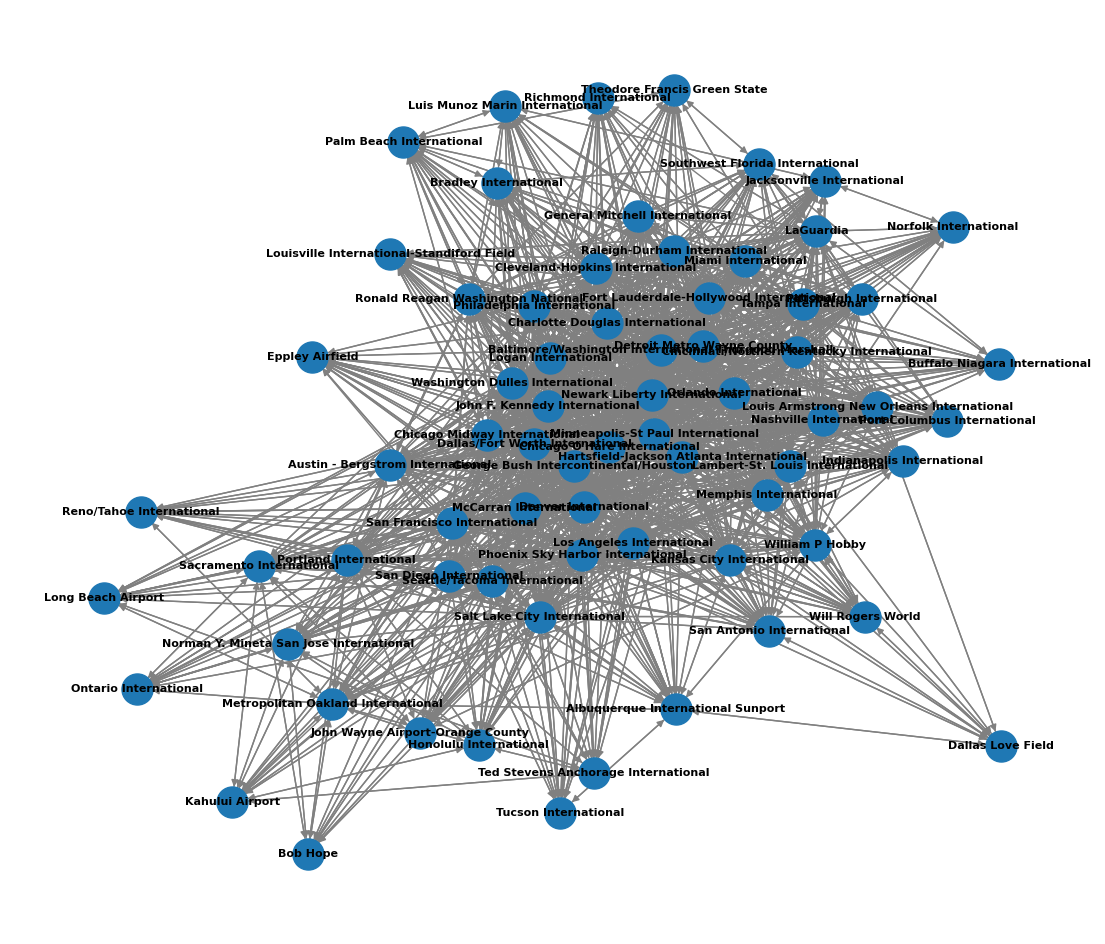

In [12]:
pos = nx.spring_layout(G)

fig, ax = plt.subplots(figsize=(14, 12))

nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_color="black", font_weight='bold', edge_color="gray", ax=ax)

plt.show()

### Aeroportos com mais conexões

In [14]:
degrees = dict(nx.degree(G))
nx.set_node_attributes(G, name='degree', values=degrees)

degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

,node,degree
8,Hartsfield-Jackson Atlanta International,126
23,Denver International,124
13,Dallas/Fort Worth International,124
35,Chicago O'Hare International,123
33,George Bush Intercontinental/Houston,120
...,...,...
62,Kahului Airport,27
66,Long Beach Airport,26
69,Ontario International,26
68,Bob Hope,22


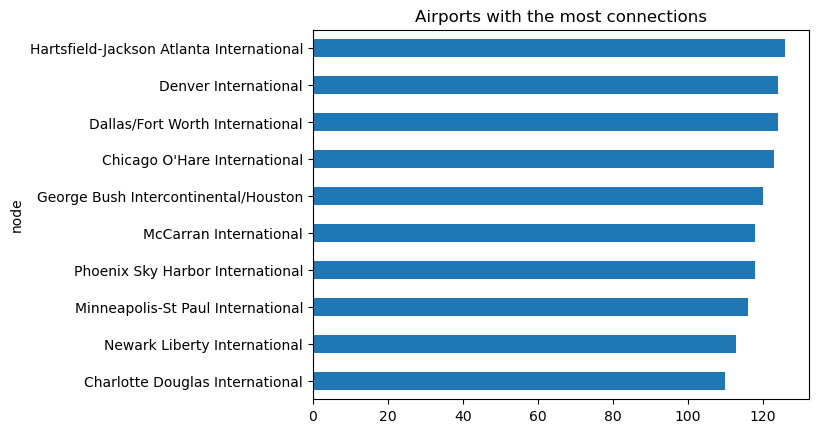

In [15]:
num_nodes_to_inspect = 10

ax = degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh')

ax.get_legend().remove()

ax.invert_yaxis()

ax.set_title('Airports with the most connections')

plt.show()

### Communities

In [17]:
communities = community.greedy_modularity_communities(G)

In [18]:
modularity_class = {}

for community_number, community in enumerate(communities):
    for name in community:
        modularity_class[name] = community_number

In [19]:
nx.set_node_attributes(G, modularity_class, 'modularity_class')

In [20]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)
communities_df

,node,modularity_class
69,Ontario International,1
62,Kahului Airport,1
53,Ted Stevens Anchorage International,1
25,John Wayne Airport-Orange County,1
24,Sacramento International,1
...,...,...
1,Miami International,0
37,Logan International,0
38,Baltimore/Washington International Thurgood Ma...,0
39,Norfolk International,0


In [21]:
communities_df[communities_df['modularity_class'] == 1]

,node,modularity_class
69,Ontario International,1
62,Kahului Airport,1
53,Ted Stevens Anchorage International,1
25,John Wayne Airport-Orange County,1
24,Sacramento International,1
23,Denver International,1
22,Seattle/Tacoma International,1
57,Chicago Midway International,1
42,Albuquerque International Sunport,1
59,Eppley Airfield,1


In [22]:
communities_df[communities_df['modularity_class'] == 0]

,node,modularity_class
51,Pittsburgh International,0
44,Raleigh-Durham International,0
47,Newark Liberty International,0
48,General Mitchell International,0
49,Louisville International-Standiford Field,0
58,Theodore Francis Green State,0
52,Cleveland-Hopkins International,0
54,Richmond International,0
55,Luis Munoz Marin International,0
56,Bradley International,0


In [23]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df

,degree,modularity_class
Detroit Metro Wayne County,106,0
Miami International,80,0
Salt Lake City International,94,1
John F. Kennedy International,108,0
Portland International,74,1
...,...,...
Will Rogers World,46,0
Long Beach Airport,26,1
Dallas Love Field,20,0
Bob Hope,22,1


### Matriz de adjacência
- As linhas e colunas representam os nós (aeroportos) e as entradas indicam a existência de uma aresta (rota). Nesse caso, o valor 1 na célula (i, j) indica que existe um voo direto do aeroporto i para o aeroporto j

In [25]:
adj_matrix = nx.adjacency_matrix(G)

# Converter a matriz de adjacência para um DataFrame
df_adj_matrix = pd.DataFrame(adj_matrix.toarray(), index=G.nodes(), columns=G.nodes())

# Exibir o DataFrame
df_adj_matrix.head()

,Detroit Metro Wayne County,Miami International,Salt Lake City International,John F. Kennedy International,Portland International,Lambert-St. Louis International,Cincinnati/Northern Kentucky International,Los Angeles International,Hartsfield-Jackson Atlanta International,Austin - Bergstrom International,...,Reno/Tahoe International,Washington Dulles International,Kahului Airport,William P Hobby,Metropolitan Oakland International,Will Rogers World,Long Beach Airport,Dallas Love Field,Bob Hope,Ontario International
Detroit Metro Wayne County,0,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
Miami International,1,0,0,1,0,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
Salt Lake City International,1,0,0,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,0,1,1
John F. Kennedy International,1,1,1,0,1,0,1,1,1,1,...,0,1,0,1,1,0,1,0,1,0
Portland International,1,0,1,1,0,0,0,1,1,1,...,1,1,1,0,1,0,1,0,1,1


### Diâmetro e Periferia da Rede
- O diâmetro da rede representa a maior distância de voo necessária para viajar entre dois aeroportos, nesse caso ele é 3, o que significa que o voo mais longo, em termos de paradas, entre quaisquer dois aeroportos na rede, requer no máximo 3 conexões
- A periferia da rede representa os aeroportos com diâmetro igual a 3, são eles: Bob Hope(Califórnia), Kahului Airport(Havaí) e Dallas Love Field(Texas)

In [27]:
print(f'Diâmetro da Rede: {nx.diameter(G)}\n')

eccentricity = nx.eccentricity(G)
# Ordenando o dicionário de excentricidades por valor em ordem decrescente
sorted_eccentricity = sorted(eccentricity.items(), key=lambda x: x[1], reverse=True)
# Selecionando os 10 maiores números
top_10_eccentricities = sorted_eccentricity[:10]
# Imprimindo os 10 maiores
for node, ecc in top_10_eccentricities:
    print(f'{node}: {ecc}')

Diâmetro da Rede: 3

Kahului Airport: 3
Dallas Love Field: 3
Bob Hope: 3
Detroit Metro Wayne County: 2
Miami International: 2
Salt Lake City International: 2
John F. Kennedy International: 2
Portland International: 2
Lambert-St. Louis International: 2
Cincinnati/Northern Kentucky International: 2


In [28]:
periphery_airports = nx.periphery(G)
periphery_airports_info = airports[airports['name'].isin(periphery_airports)]
print(periphery_airports_info[['name','city', 'state']])

                  name     city state
38            Bob Hope  Burbank    CA
116    Kahului Airport  Kahului    HI
305  Dallas Love Field   Dallas    TX


### Esparsidade/Densidade da Rede 
- A densidade da rede indica o quão interconectada ela é. Nossa rede de aeroportos tem densidade de 0.52, o que significa que mais da metade das conexões possíveis entre aeroportos estão presentes, indicando uma boa conectividade, onde é relativamente fácil viajar de um aeroporto para outro, com muitas rotas diretas disponíveis ou com poucas conexões intermediárias necessárias.

In [30]:
density = nx.density(G)
print("Densidade da rede:", density)

# Determinar se a rede é esparsa ou densa
if density < 0.1:
    print("A rede é esparsa")
else:
    print("A rede é densa")

Densidade da rede: 0.5202898550724637
A rede é densa


### Assortatividade da Rede
- Na nossa rede de aeroportos temos uma assortatividade negativa, o que significa que os nós de alto grau/hubs (aeroportos principais com muitas conexões) tendem a se conectar com nós de baixo grau (aeroportos menores com poucas conexões), é uma rede eficiente para distribuir passageiros e carga de grandes centros para áreas menores e vice-versa. No entanto, pode haver menos conexões diretas entre aeroportos menores, o que pode aumentar a necessidade de escalas em hubs principais. Em caso de falhas ou ataques direcionados aos hubs, a rede pode sofrer grandes interrupções.

In [32]:
assortativity_degree = nx.degree_assortativity_coefficient(G)
print("Assortatividade da rede:", assortativity_degree)

Assortatividade da rede: -0.25307314245688256


### Histograma de Distribuição Empírica de Grau
- Este histograma mostra a frequência de aeroportos em relação ao número de conexões que eles têm, revelando a distribuição de grau da rede, a visualização mostra a presença de aeroportos com um número muito alto de conexões e aeroportos com um número baixo de conexões

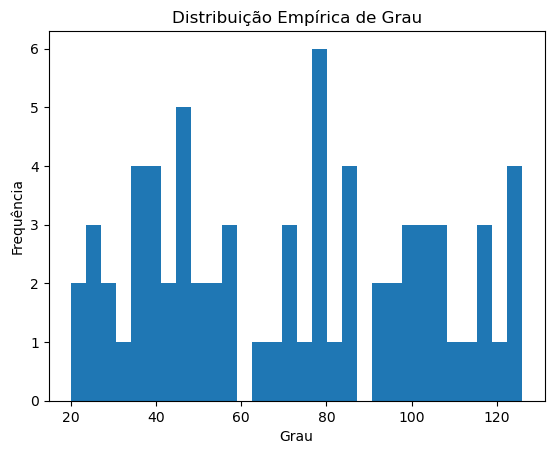

In [34]:
# Histograma de Distribuição Empírica de Grau
degree_hist = [d for n, d in G.degree()]
plt.hist(degree_hist, bins=30)
plt.title("Distribuição Empírica de Grau")
plt.xlabel("Grau")
plt.ylabel("Frequência")
plt.show()

- Os coeﬁciente de clustering local
    - Um alto coeficiente de clustering local para um aeroporto x indica que muitos dos aeroportos que têm voos diretos para x também têm voos diretos entre si
    - Valores Próximos de 1: Um valor de clustering local próximo de 1 indica que quase todos os vizinhos de um aeroporto estão interconectados
    - Valores Próximos de 0: Um valor de clustering local próximo de 0 indica que poucos ou nenhum dos vizinhos de um aeroporto estão conectados entre si.
- Coeﬁciente de clustering global
    - Um coeficiente de clustering global de 0.68 indica que há uma alta tendência de agrupamento na rede. Isso significa que, se um aeroporto x está conectado a dois outros aeroportos y e z, existe uma alta probabilidade (68%) de que y e z também estejam conectados entre si

In [36]:
# Coeficiente de Clustering Local
clustering_coefficient_local = nx.clustering(G)

# Coeficiente de Clustering Global
clustering_coefficient_global = nx.transitivity(G)

# Componentes Conectados Fracamente
weakly_connected = list(nx.weakly_connected_components(G))

# Componentes Conectados Fortemente
strongly_connected = list(nx.strongly_connected_components(G))

# Ordenar e selecionar os 10 maiores coeficientes de clustering local
sorted_clustering_local = sorted(clustering_coefficient_local.items(), key=lambda x: x[1], reverse=True)[:10]

# Ordenar e selecionar os 10 maiores componentes fortemente conectados
largest_strongly_connected = sorted(strongly_connected, key=len, reverse=True)[:10]

# Ordenar e selecionar os 10 maiores componentes fracamente conectados
largest_weakly_connected = sorted(weakly_connected, key=len, reverse=True)[:10]

# Exibir valores calculados de forma mais legível
print("Coeficiente de Clustering Local (Top 10):")
for node, coeff in sorted_clustering_local:
    print(f"{node}: {coeff}")

print("\nCoeficiente de Clustering Global:")
print(f"{clustering_coefficient_global:.4f}")

print("\nComponentes Conectados Fortemente (Top 10):")
for i, comp in enumerate(largest_strongly_connected, start=1):
    print(f"Componente {i}: {list(comp)}")

print("\nComponentes Conectados Fracamente (Top 10):")
for i, comp in enumerate(largest_weakly_connected, start=1):
    print(f"Componente {i}: {list(comp)}")

Coeficiente de Clustering Local (Top 10):
Tucson International: 0.9714285714285714
Richmond International: 0.967373572593801
Eppley Airfield: 0.9475308641975309
Louisville International-Standiford Field: 0.9369834710743802
General Mitchell International: 0.9285714285714286
Norfolk International: 0.9269005847953217
Port Columbus International: 0.9266117969821673
Reno/Tahoe International: 0.9230769230769231
Bob Hope: 0.9090909090909091
Buffalo Niagara International: 0.9035087719298246

Coeficiente de Clustering Global:
0.6850


### Medindo a importância dos nós
- Eigenvector centrality
- Degree centrality
- Closeness centrality
- Betweenness centrality

#### Eigenvector centrality
-  Aeroportos com valores altos de eigenvector centrality são altamente conectados a outros aeroportos igualmente importantes, fazendo deles pontos críticos na rede.
- Com essa medida vamos identificar aeroportos estrategicamente importantes em uma rede de aeroportos. Ele leva em conta não apenas quantas conexões um aeroporto tem, mas também a importância dos aeroportos aos quais ele está conectado

In [39]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [40]:
sorted_ec = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)
top_ec = sorted_ec[:10]
#print(f"Top 10 nós por eigenvector centrality:", top_ec)

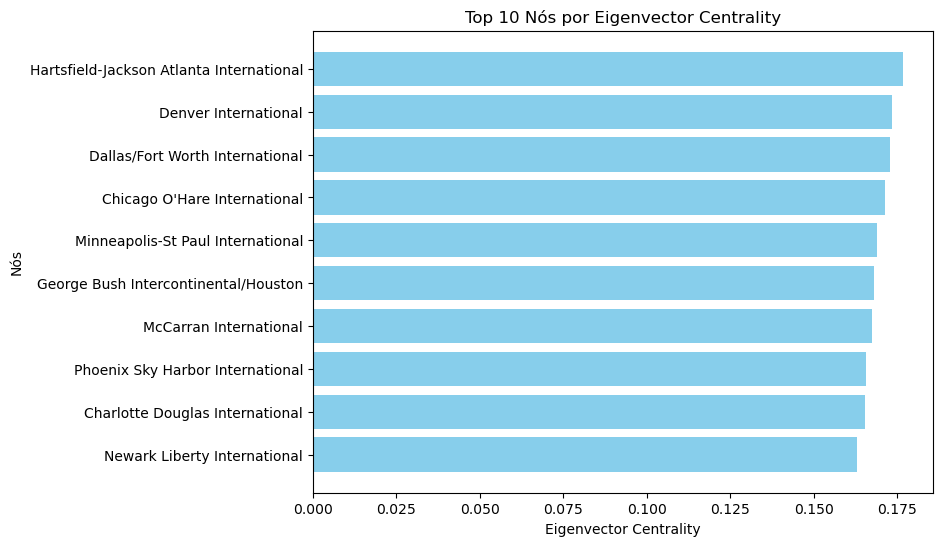

In [41]:
nodes = [item[0] for item in top_ec]
centrality_values = [item[1] for item in top_ec]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(nodes, centrality_values, color='skyblue')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Nós')
plt.title('Top 10 Nós por Eigenvector Centrality')
plt.gca().invert_yaxis()
plt.show()

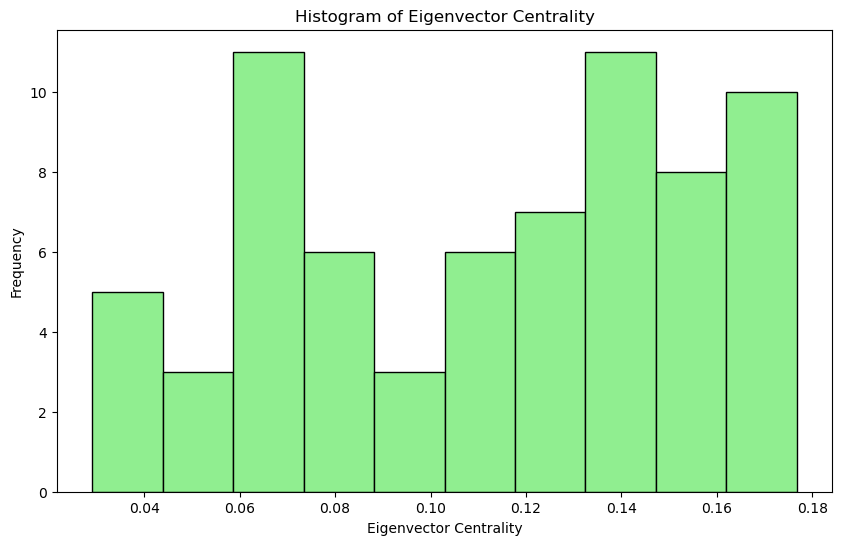

In [42]:
# Eigenvector Centrality Histogram
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_centrality.values(), bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Eigenvector Centrality')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.show()

#### Degree centrality
- O Degree Centrality (Centralidade de Grau) mede o grau de um nó, ou seja, quantos vizinhos (conexões diretas) ele tem
- Aeroportos com alta centralidade de grau são considerados hubs principais, pois têm muitas conexões diretas com outros aeroportos

In [44]:
degree_centrality = nx.degree_centrality(G)

In [45]:
sorted_dc = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
top_dc = sorted_dc[:10]
#print(f"Top 10 nós por degree centrality:", top_dc)

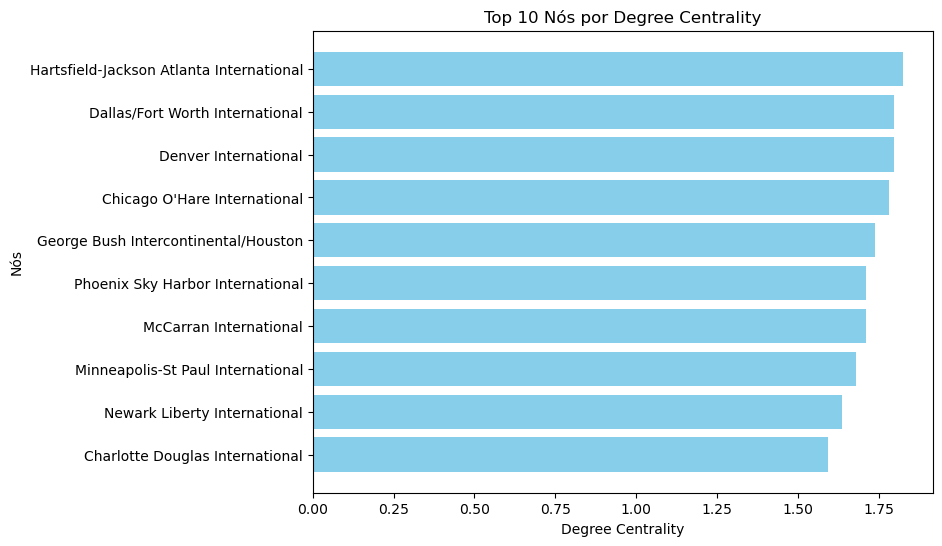

In [46]:
nodes = [item[0] for item in top_dc]
centrality_values = [item[1] for item in top_dc]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(nodes, centrality_values, color='skyblue')
plt.xlabel('Degree Centrality')
plt.ylabel('Nós')
plt.title('Top 10 Nós por Degree Centrality')
plt.gca().invert_yaxis()
plt.show()

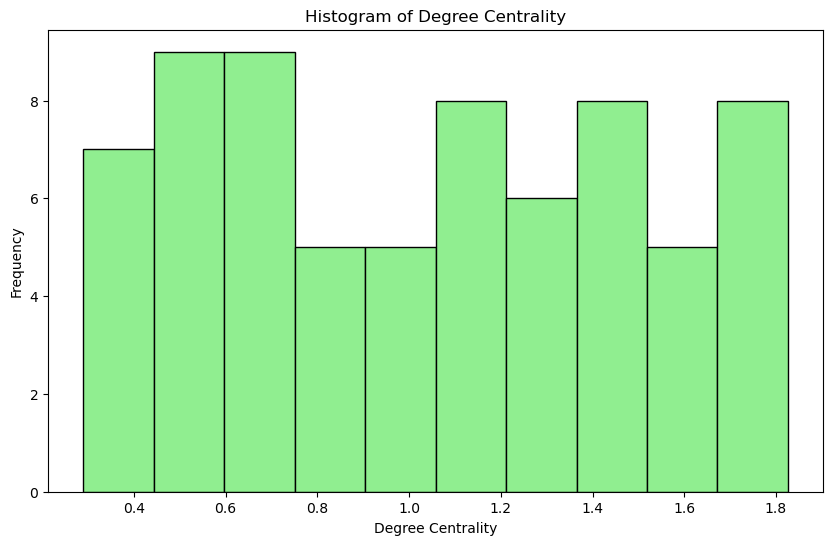

In [47]:
# Degree Centrality Histogram
plt.figure(figsize=(10, 6))
plt.hist(degree_centrality.values(), bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.show()

#### Closeness centrality
- O Closeness Centrality avalia o quão perto um nó (aeroporto) está de todos os outros nós na rede, mede a rapidez com que uma viagem pode se espalhar a partir de um nó para todos os outros na rede
- Os aeroportos com alta centralidade de proximidade são, em média, mais próximos de todos os outros aeroportos, indicando que eles são pontos eficientes para distribuir voos e passageiros

In [49]:
closeness_centrality = nx.closeness_centrality(G)

In [50]:
sorted_cc = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
top_cc = sorted_cc[:10]
#print(f"Top 10 nós por closeness centrality:", top_cc)

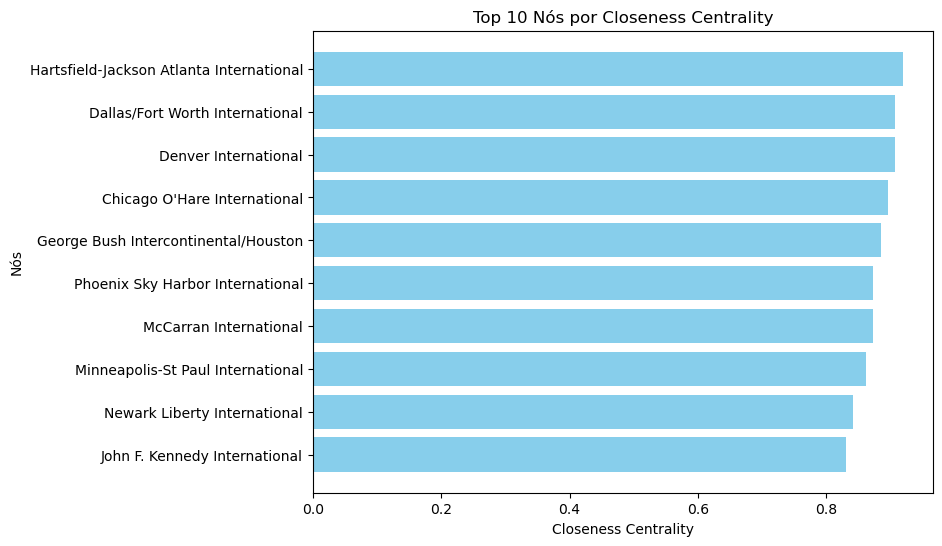

In [51]:
nodes = [item[0] for item in top_cc]
centrality_values = [item[1] for item in top_cc]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(nodes, centrality_values, color='skyblue')
plt.xlabel('Closeness Centrality')
plt.ylabel('Nós')
plt.title('Top 10 Nós por Closeness Centrality')
plt.gca().invert_yaxis()
plt.show()

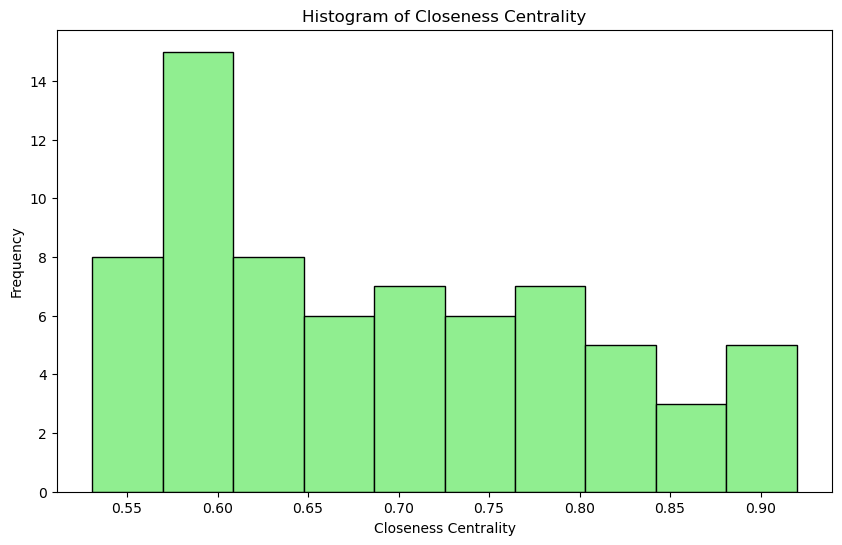

In [96]:
# Betweenness Centrality Histogram
plt.figure(figsize=(10, 6))
plt.hist(closeness_centrality.values(), bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.show()

#### Betweenness centrality
- O betweenness centrality identifica a importância de um nó como ponte ou intermediário na comunicação de aeroportos, medindo quantas vezes um nó age como um ponto de passagem para a comunicação entre outros nós
- Aeroportos com alta centralidade de intermediação são essenciais para a conectividade da rede, pois muitos caminhos de rotas passam por eles. Eles são frequentemente a ligação entre diferentes partes da rede

In [54]:
betweenness_centrality = nx.betweenness_centrality(G)

In [55]:
sorted_bc = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
top_bc = sorted_bc[:10]
#print(f"Top 10 nós por betweenness centrality:", top_bc)

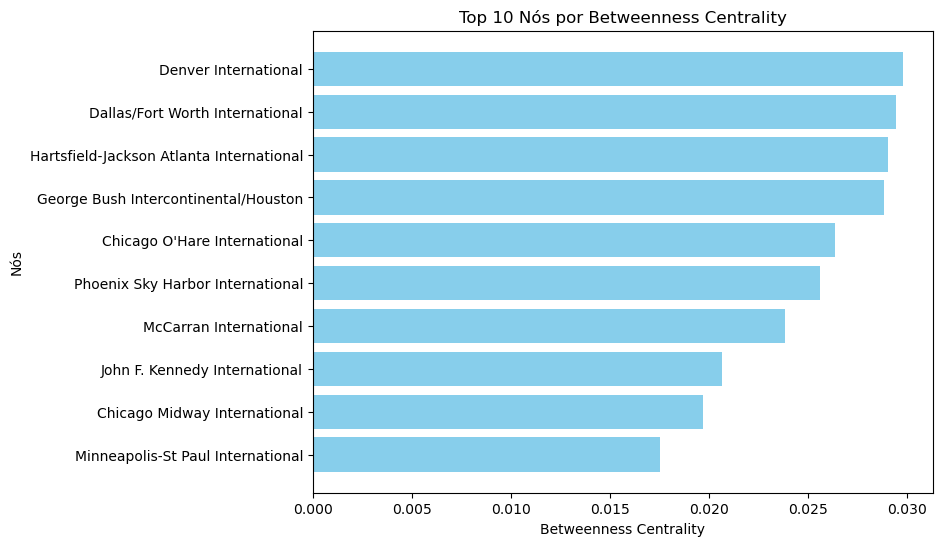

In [56]:
nodes = [item[0] for item in top_bc]
centrality_values = [item[1] for item in top_bc]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(nodes, centrality_values, color='skyblue')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Nós')
plt.title('Top 10 Nós por Betweenness Centrality')
plt.gca().invert_yaxis()
plt.show()

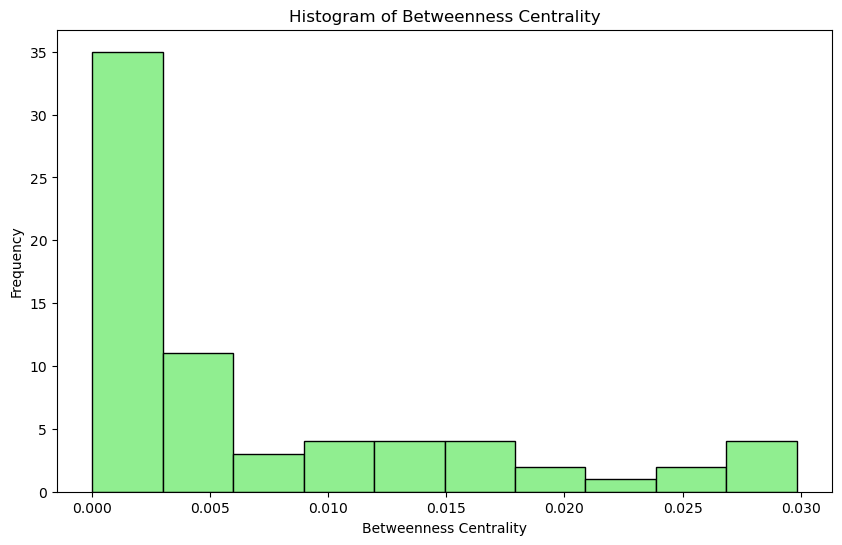

In [57]:
# Betweenness Centrality Histogram
plt.figure(figsize=(10, 6))
plt.hist(betweenness_centrality.values(), bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.show()

- Os aeroportos de Hartsfield-jackson Atlanta International, Denver International e Dallas/Fort Worth International aparecem em todas as métricas, sendo aeroportos importantes para a rede.